In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/skin type/skin_type_dataset.csv')

In [ ]:
df.head()

,Q1: How does your skin feel after cleansing?,Q2: How often do you experience acne or breakouts?,Q3: How often does your skin feel greasy throughout the day?,Q4: Does your skin flake or peel?,Q5: Do you experience redness or irritation?,Skin Type
0,A,C,B,C,C,Normal
1,B,B,B,A,B,Oily
2,C,B,B,B,A,Oily
3,B,C,B,B,A,Oily
4,B,C,C,C,B,Normal


In [ ]:
# Extract features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # The last column (skin type)

In [ ]:
# Encode categorical features (questions)
X_encoded = np.array([[ord(c) - ord('A') for c in row] for row in X])  # Convert answers to integers

In [ ]:
# Encode labels (skin types)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# Reshape data for CNN (Conv1D expects 3D input)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes for skin types

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/20
20/20 - 2s - loss: 1.1766 - accuracy: 0.4688 - val_loss: 0.9873 - val_accuracy: 0.5875 - 2s/epoch - 109ms/step
Epoch 2/20
20/20 - 0s - loss: 0.6448 - accuracy: 0.7312 - val_loss: 0.9490 - val_accuracy: 0.6250 - 121ms/epoch - 6ms/step
Epoch 3/20
20/20 - 0s - loss: 0.5491 - accuracy: 0.7781 - val_loss: 0.9591 - val_accuracy: 0.6000 - 118ms/epoch - 6ms/step
Epoch 4/20
20/20 - 0s - loss: 0.4352 - accuracy: 0.8156 - val_loss: 0.9667 - val_accuracy: 0.5063 - 117ms/epoch - 6ms/step
Epoch 5/20
20/20 - 0s - loss: 0.3750 - accuracy: 0.8484 - val_loss: 0.9862 - val_accuracy: 0.3812 - 124ms/epoch - 6ms/step
Epoch 6/20
20/20 - 0s - loss: 0.3267 - accuracy: 0.8813 - val_loss: 1.0296 - val_accuracy: 0.2937 - 115ms/epoch - 6ms/step
Epoch 7/20
20/20 - 0s - loss: 0.2950 - accuracy: 0.8922 - val_loss: 1.0895 - val_accuracy: 0.2625 - 111ms/epoch - 6ms/step
Epoch 8/20
20/20 - 0s - loss: 0.2723 - accuracy: 0.8922 - val_loss: 1.1560 - val_accuracy: 0.2875 - 112ms/epoch - 6ms/step
Epoch 9/20
20/20 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

7/7 - 0s - loss: 0.4491 - accuracy: 0.8000 - 211ms/epoch - 30ms/step
Test loss: 0.4491
Test accuracy: 0.8000


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/skin type/skin_type_cnn_model.h5')
print("Model saved as 'skin_type_cnn_model.h5'")

Model saved as 'skin_type_cnn_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


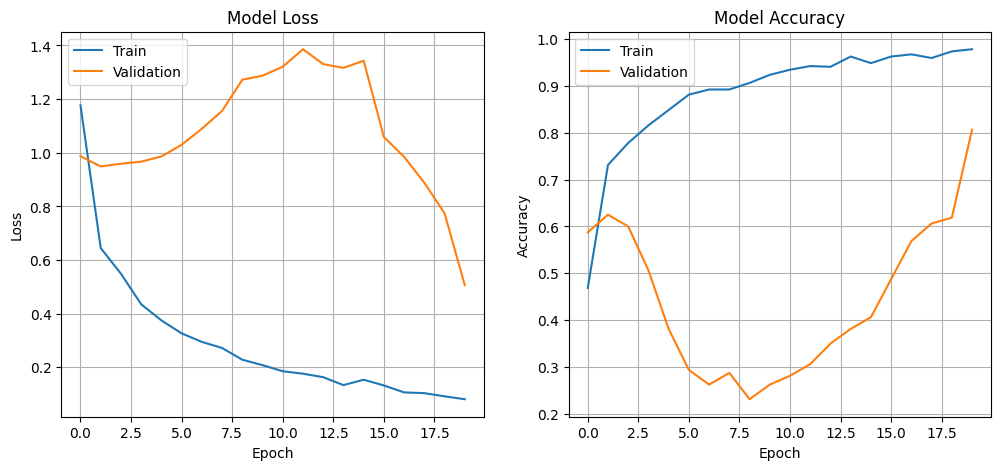

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)